In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler
from collections import Counter
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from typing import FrozenSet
STOPWORDS: FrozenSet[str] = frozenset(""" آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں  """
                                        .split())

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
file_path = '/content/drive/MyDrive/im_dataset/Urdu Annotated Data.xlsx'
df = pd.read_excel(file_path, sheet_name='software,blog and forum reviews')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/im_dataset/Urdu Annotated Data.xlsx'

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Select relevant columns
df = df[['Text', 'Annotator 1', 'Annotator neg', 'Annotator 3']]

# Create a unified label column
df['Label'] = df[['Annotator 1', 'Annotator neg', 'Annotator 3']].mode(axis=1)[0]
df = df[['Text', 'Label']]

In [ ]:
def remove_special_characters(text):
    """Remove special characters and non-Urdu text."""
    text = re.sub(r'[^ا-ے\s]', '', text)  # Keep only Urdu characters and spaces
    return text

def tokenize_and_remove_stopwords(text):
    """Tokenize text and remove stopwords."""
    tokens = nltk.word_tokenize(text)
    return [word for word in tokens if word not in STOPWORDS]

def apply_lexicon_and_pad(tokenized_texts, max_len=20):
    """Create lexicon, map tokens to indices, and apply padding."""
    word_counter = Counter([word for tokens in tokenized_texts for word in tokens])
    lexicon = {word: idx + 1 for idx, (word, _) in enumerate(word_counter.most_common())}
    tokenized_indices = [[lexicon[word] for word in tokens if word in lexicon] for tokens in tokenized_texts]
    padded_sequences = pad_sequences(tokenized_indices, maxlen=max_len, padding='post', truncating='post')
    return padded_sequences, lexicon


In [ ]:
# Clean and preprocess text
df['Cleaned_Text'] = df['Text'].apply(remove_special_characters)
df['Tokenized_Text'] = df['Cleaned_Text'].apply(tokenize_and_remove_stopwords)

# Apply lexicon and padding
max_len = 20
padded_sequences, lexicon = apply_lexicon_and_pad(df['Tokenized_Text'], max_len)

# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
y = to_categorical(df['Encoded_Label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build ANN Model
def build_ann_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Build and Train Model
model = build_ann_model(max_len, y_train.shape[1])



In [ ]:
#Learning rate scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.9 if epoch > 10 else lr

callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 1.6423206034232862e-05.
Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6417 - loss: 0.7951 - val_accuracy: 0.6000 - val_loss: 0.9041 - learning_rate: 1.6423e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.6423206034232862e-05.
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6680 - loss: 0.7727 - val_accuracy: 0.6025 - val_loss: 0.9028 - learning_rate: 1.6423e-05

Epoch 3: LearningRateScheduler setting learning rate to 1.6423206034232862e-05.
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.7803 - val_accuracy: 0.6000 - val_loss: 0.9020 - learning_rate: 1.6423e-05

Epoch 4: LearningRateScheduler setting learning rate to 1.6423206034232862e-05.
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6466 - loss: 0.7790 - val_accuracy: 0.6025 - val_loss: 0.9033 - learning_rate: 1.6423e-05

Epoch 5: LearningRateScheduler setting learning rate to

In [ ]:
# Evaluate Model
results = model.evaluate(X_test, y_test, verbose=1)
print("Test Results:", dict(zip(model.metrics_names, results)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 0.9459 
Test Results: {'loss': 0.9484982490539551, 'compile_metrics': 0.56886225938797}


In [ ]:
# Make Predictions
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Metrics
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step

Classification Report:
               precision    recall  f1-score   support

         neg       0.24      0.07      0.11        70
         neu       0.41      0.26      0.32       147
         pos       0.63      0.85      0.72       284

    accuracy                           0.57       501
   macro avg       0.42      0.39      0.38       501
weighted avg       0.51      0.57      0.52       501


Confusion Matrix:
 [[  5  20  45]
 [  9  38 100]
 [  7  35 242]]


In [ ]:
import matplotlib.pyplot as plt


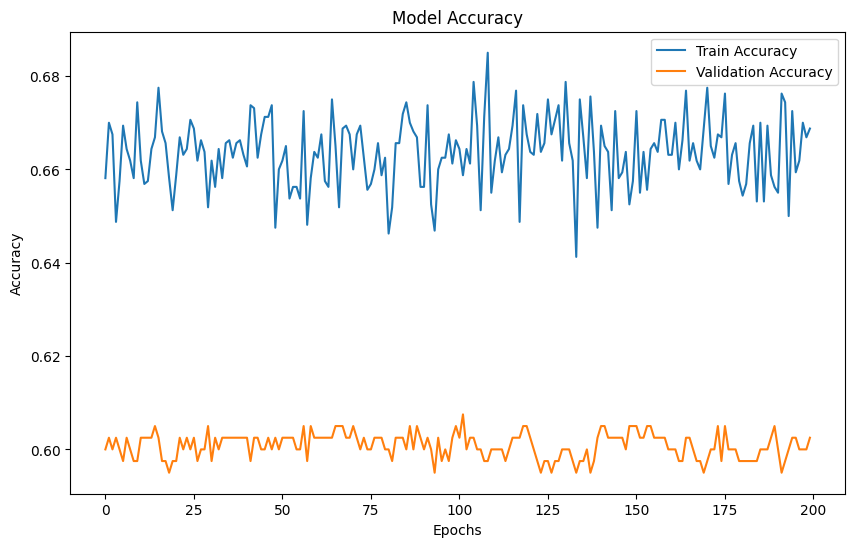

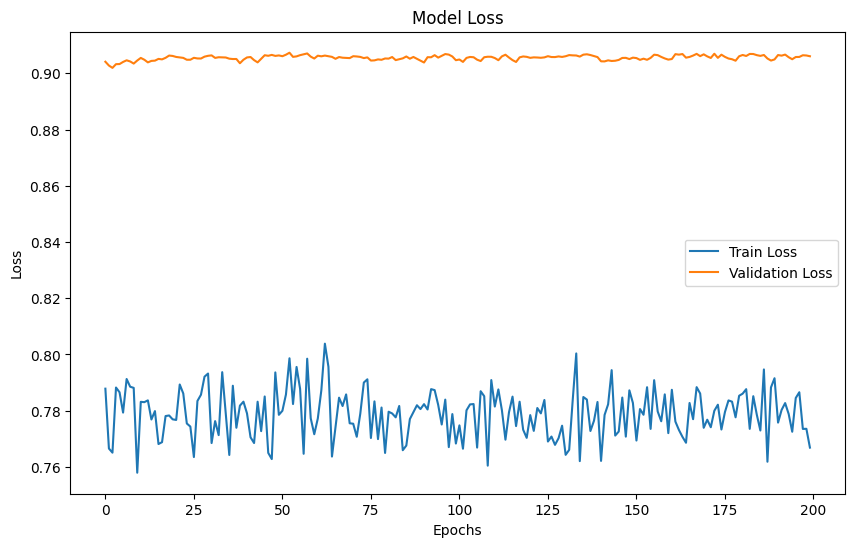

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df, text_column, label_column):
    """
    Perform Exploratory Data Analysis (EDA) on the given dataset.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - text_column: The column containing text data.
    - label_column: The column containing labels.

    Returns:
    - None
    """
    print("---- Dataset Information ----")
    print(f"Total Samples: {len(df)}")
    print(df.info())

    print("\n---- Missing Values ----")
    print(df.isnull().sum())

    print("\n---- Label Distribution ----")
    label_counts = df[label_column].value_counts()
    print(label_counts)

    print("\n---- Text Length Distribution ----")
    text_lengths = df[text_column].apply(lambda x: len(x.split()))
    print(f"Mean Text Length: {text_lengths.mean():.2f}")
    print(f"Max Text Length: {text_lengths.max()}")
    print(f"Min Text Length: {text_lengths.min()}")

    print("\n---- Sample Texts ----")
    print(df[[text_column, label_column]].sample(5))

    # Plot Label Distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Plot Text Length Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(text_lengths, bins=30, kde=True, color='blue')
    plt.title('Text Length Distribution')
    plt.xlabel('Text Length (Number of Words)')
    plt.ylabel('Frequency')
    plt.show()


---- Dataset Information ----
Total Samples: 2501
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            2501 non-null   object
 1   Label           2501 non-null   object
 2   Cleaned_Text    2501 non-null   object
 3   Tokenized_Text  2501 non-null   object
 4   Encoded_Label   2501 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 97.8+ KB
None

---- Missing Values ----
Text              0
Label             0
Cleaned_Text      0
Tokenized_Text    0
Encoded_Label     0
dtype: int64

---- Label Distribution ----
Label
pos    1526
neu     649
neg     326
Name: count, dtype: int64

---- Text Length Distribution ----
Mean Text Length: 19.98
Max Text Length: 208
Min Text Length: 1

---- Sample Texts ----
                                                   Text Label
2041  آپ ویکیپیڈیا میں داخل نہیں ہوئے ہیں لہذا اگر آ...  

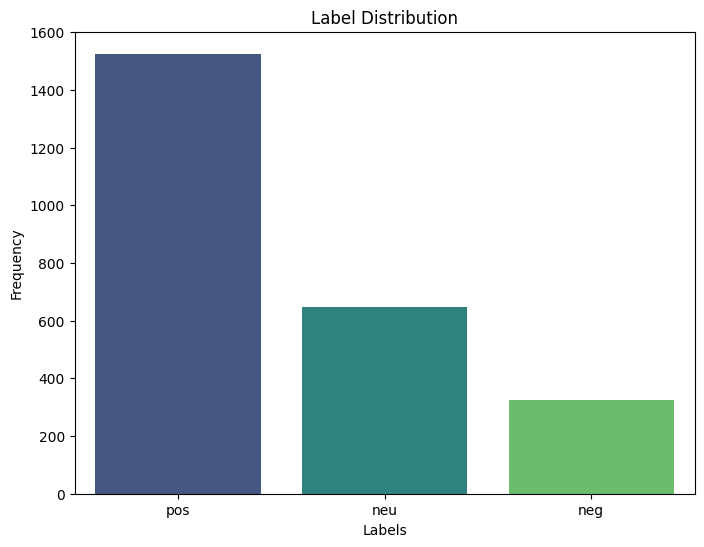

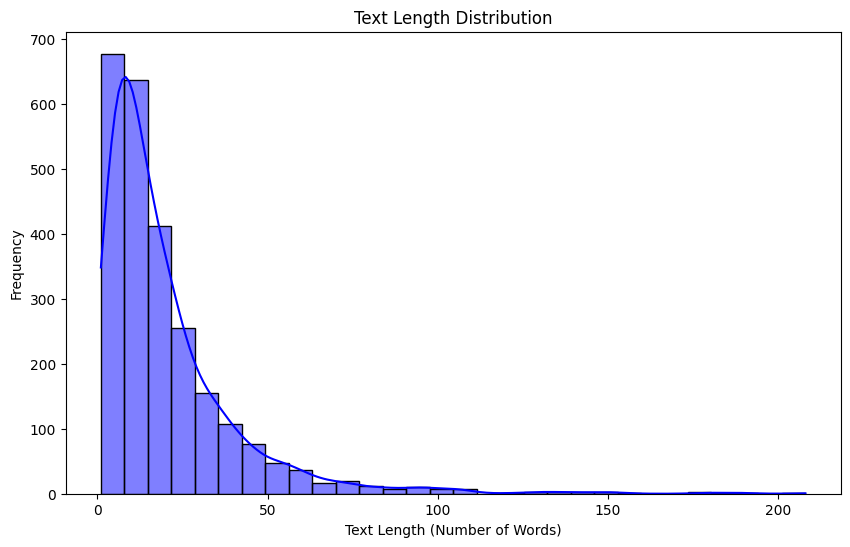

In [ ]:
# Call the function with your DataFrame
perform_eda(df, text_column='Text', label_column='Label')


In [ ]:
from nltk.util import ngrams

In [ ]:
def add_ngrams_to_dataframe(df, text_column='Tokenized_Text'):
    """
    Generate uni-grams, bi-grams, and tri-grams from a tokenized text column
    and add them as separate columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the tokenized text.
    - text_column: The column name with tokenized text (default: 'Tokenized_Text').

    Returns:
    - df: Updated DataFrame with new n-gram columns.
    """
    for n in range(1, 4):  # Uni-grams, Bi-grams, Tri-grams
        column_name = f'{n}-grams'
        df[column_name] = df[text_column].apply(lambda tokens: [" ".join(gram) for gram in ngrams(tokens, n)])
    return df


In [ ]:
# Add n-grams to the DataFrame
df = add_ngrams_to_dataframe(df)

# Display the resulting DataFrame
print(df[['Text', '1-grams', '2-grams', '3-grams']].head())


                                                Text  \
0  جہاں تک بہترین سوفٹویئر کی بات ہے تو بہترین سو...   
1  معذرت چاہتا ہوں میں کسی اور خیال میں تھا میں ی...   
2  اردو کے لئے سب سے آسان مائکروسوفٹ پبلشر ہے اور...   
3  \nپیشگی معذرت اسد بھائی  \nاگر آپ مائیکرو سافٹ...   
4  عارف کریم بھائی  کرننگ کی وضاحت ہو تو مجھ جیسا...   

                                             1-grams  \
0  [بہترین, سوفٹویر, بات, بہترین, سوفٹویر, پ, است...   
1  [معذرت, چاہتا, خیال, دونوں, سوفٹویر, استعمال, ...   
2                [اردو, سان, ماکروسوفٹ, پبلشر, سستا]   
3  [پیشگی, معذرت, اسد, بھای, پ, مایکرو, سافٹ, ورڈ...   
4    [عارف, کریم, بھای, کرننگ, وضاحت, مبتدی, مستفید]   

                                             2-grams  \
0  [بہترین سوفٹویر, سوفٹویر بات, بات بہترین, بہتر...   
1  [معذرت چاہتا, چاہتا خیال, خیال دونوں, دونوں سو...   
2  [اردو سان, سان ماکروسوفٹ, ماکروسوفٹ پبلشر, پبل...   
3  [پیشگی معذرت, معذرت اسد, اسد بھای, بھای پ, پ م...   
4  [عارف کریم, کریم بھای, بھای کرننگ, کرننگ وض